<a href="https://colab.research.google.com/github/MpRonald/Machine-Learning/blob/main/Forecasting_with_Facebook_Prophet_for_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
!pip install pystan fbprophet

In [3]:
import pandas as pd
from fbprophet import Prophet

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/nicknochnack/TimeSeriesForecastingProphet/main/dataset.csv')
data.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time Date  1080 non-null   int64  
 1   Product    1080 non-null   int64  
 2   Store      1080 non-null   object 
 3   Value      1080 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 33.9+ KB


In [6]:
data.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [7]:
data['Year'] = data['Time Date'].apply(lambda x: str(x)[-4:])
data['Month'] = data['Time Date'].apply(lambda x: str(x)[-6:-4])
data['Day'] = data['Time Date'].apply(lambda x: str(x)[:-6])
data['ds'] = pd.DatetimeIndex(data['Year']+'-'+data['Month']+'-'+data['Day'])

In [8]:
data.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [9]:
data.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
data.columns = ['y', 'ds']

In [10]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(data)

In [11]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3040.168654,799.899579,4026.607719,3040.168654,3040.168654,-646.907682,-646.907682,-646.907682,462.591916,...,16.646724,16.646724,16.646724,-1126.146323,-1126.146323,-1126.146323,0.0,0.0,0.0,2393.260972
1,2018-01-02,3040.968888,963.598017,3962.726464,3040.968888,3040.968888,-656.878775,-656.878775,-656.878775,462.591916,...,-11.260909,-11.260909,-11.260909,-1108.209782,-1108.209782,-1108.209782,0.0,0.0,0.0,2384.090113
2,2018-01-03,3041.769121,710.796555,3938.179924,3041.769121,3041.769121,-630.891873,-630.891873,-630.891873,462.591916,...,-4.393592,-4.393592,-4.393592,-1089.090198,-1089.090198,-1089.090198,0.0,0.0,0.0,2410.877248
3,2018-01-04,3042.569354,962.847517,4165.248804,3042.569354,3042.569354,-583.805741,-583.805741,-583.805741,462.591916,...,22.468361,22.468361,22.468361,-1068.866019,-1068.866019,-1068.866019,0.0,0.0,0.0,2458.763613
4,2018-01-05,3043.369588,798.972042,3983.758478,3043.369588,3043.369588,-619.671450,-619.671450,-619.671450,462.591916,...,-34.595035,-34.595035,-34.595035,-1047.668332,-1047.668332,-1047.668332,0.0,0.0,0.0,2423.698137


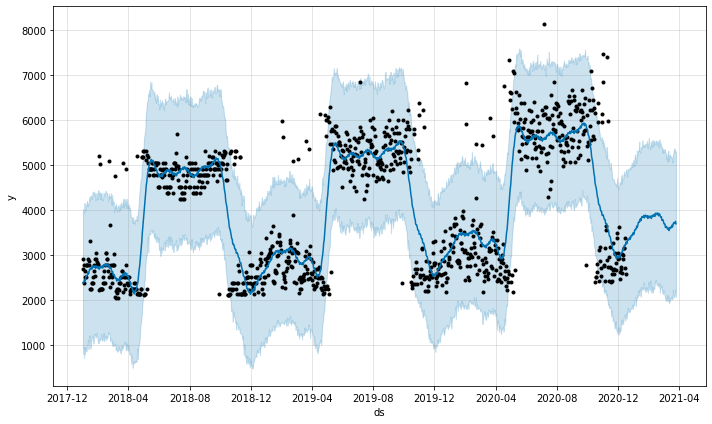

In [13]:
plot1 = m.plot(forecast)

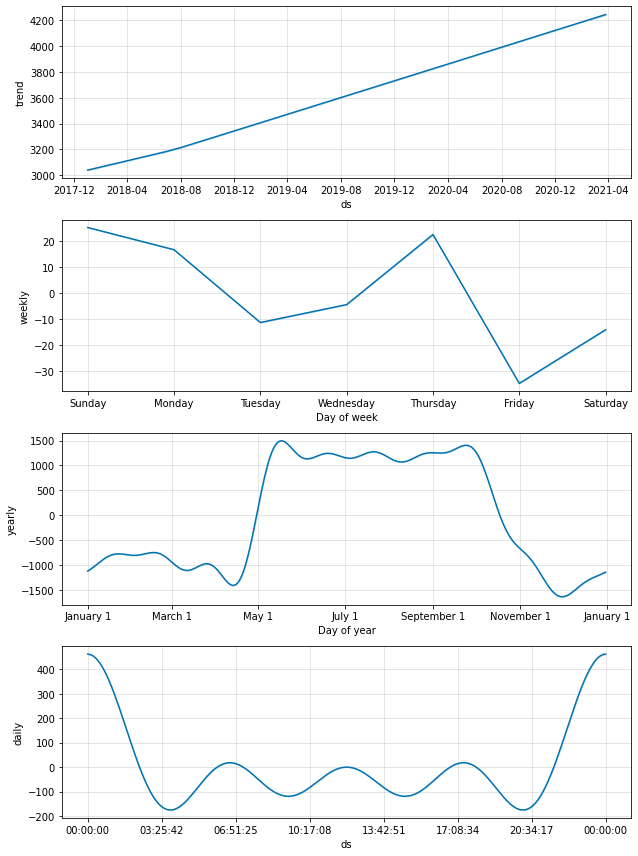

In [12]:
plt2 = m.plot_components(forecast)